In [1]:
pip install pickle-mixin

  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=5998 sha256=6a297438066720cce840a8690cc1b847db55c0bcd5347e9085192b2e27565ace
  Stored in directory: c:\users\ayushman\appdata\local\pip\cache\wheels\2a\a4\6c\83bfbc3b94f1bb43d634b07a6a893fd437a45c58b29aea5142
Successfully built pickle-mixin
Note: you may need to restart the kernel to use updated packages.


# <div style="text-align: center"> DATA ANALYTICS MODEL FOR VIBRATION DATA </div>

The dataset used in this notebook can be found in the link: http://www02.smt.ufrj.br/~offshore/mfs/page_01.html

#### Note on Dataset:
There are 8 sensors(and so 8 columns) in every data file, out of which column 1 and 8 represent sound and rotational angle respectively. However since we are working explicitly on vibration signals from accelerometers, these columns are rejected and remaining columns from 2-7 are used for the analysis  
More details can be found from the website of the dataset given above.

This code is mainly divided into 2 sections: Data pre-processing and Data analysis

Data pre-processing includes further 2 sub-sections: Data Cleaning and Data Scaling

Data Analysis includes following modules:
1. Time Domain Analysis
2. Frequency Domain Analysis
3. Time-Frequemcy Domain Analysis
4. Feature Extraction
5. Feature Ranking 
6. Binary Classification
7. Multi-class Classification

## (a) IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.fft
import glob as gb
import os

In [2]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

## (b) UPLOAD THE DATASET (change the path to the file as per the current directory)

In [9]:
#To read the files correctly, make sure it's present in the directory you are working in. Else modify the below lines of code by entering the location of file stored in your computer
df1 = pd.DataFrame(pd.read_csv("D:/MAFAULDA/normal/18.432.csv")) #pd.DataFrame(pd.read_csv('Location of file\name of file'))
df2= pd.DataFrame(pd.read_csv("D:/MAFAULDA/horizontal-misalignment/0.5mm/18.8416.csv"))
df3=pd.DataFrame(pd.read_csv("D:/MAFAULDA/vertical-misalignment/0.51mm/18.8416.csv"))
# df3= pd.DataFrame(pd.read_csv(""))
# print(type(df))
# df=df.fillna(0)

## (c) CLEANING THE DATASET

In data cleaning we are fixing missing values, NaN values, and other non-float values by replacing them with mean of their respective columns.

We are also filtering outliers by ensuring the data lies within the acceptable ranges of values for all the columns

In [ ]:
def rem_dups(df):
    df.drop_duplicates(keep='first', inplace=False)            #Dropping any duplicate columns ()
    return df

def remove_outliers_z(df):
    z = np.abs(stats.zscore(df))
    data_clean = df[(z<4).all(axis=1)]
    data_clean.shape
    return data_clean

def fix_missing(df):
    
    df_numeric = df.select_dtypes(include=[np.number])
    numeric_cols = df_numeric.columns.values
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))
    for col in df.columns:
        missing = df[col].isnull()
        num_missing = np.sum(missing)
    
    
    if num_missing > 0:  
        print('imputing missing values for: {}'.format(col))
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)
    return df     

In [ ]:
#More Harsh Than Z score
# def remove_outliers_IQR(df):
#   Q1 = df.quantile(q=.25)
#   Q3 = df.quantile(q=.75)
#   IQR = df.apply(stats.iqr)

#   #only keep rows in dfframe that have values within 1.5*IQR of Q1 and Q3
#   df_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]
#   return df_clean

In [ ]:
nodups = rem_dups(df1.iloc[:,1:7])
removed_missing_data=fix_missing(nodups)
removed_outliers=remove_outliers_z(removed_missing_data)

## (d) SCALING OF THE DATASET

Scaling of the data comes under the set of steps of data pre-processing when we are performing machine learning algorithms in the data set. As we know most of the supervised and unsupervised learning methods make decisions according to the data sets applied to them and often the algorithms calculate the distance between the data points to make better inferences out of the data.

**Standardization:** The basic concept behind the standardization function is to make data points centred about the mean of all the data points presented in a feature with a unit standard deviation. This means the mean of the data point will be zero and the standard deviation will be 1

**Normalization:** It is a very common approach to scaling the data. In this method of scaling the data, the minimum value of any feature gets converted into 0 and the maximum value of the feature gets converted into 1.

There are multiple Scaling methods. We have tested following methods: 
1. StandardScaler
2. MinMaxScaler
3. MaxAbsScaler
4. Robust Scaler
5. Quantile Transformer
6. Power Transformer

Out of the above methods, we have currently employed the Standard Scaler for the current dataset

In [10]:
# importing Standard Scaler
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()

df1 = pd.DataFrame(s_scaler.fit_transform(df1))
df2 = pd.DataFrame(s_scaler.fit_transform(df2))
df3 = pd.DataFrame(s_scaler.fit_transform(df3))

## 1. TIME DOMAIN ANALYSIS

## 1.1 Choose the columns you want to visualize the time features of: 

The time domain features are:
1. Rolling mean
2. Rolling variance
3. Rolling kurtosis
4. Roling std deviation
5. Roling skewness
6. Rolling mininum
7. Rolling maximum


Here column 1 is chosen for demonstration, you can choose other columns from 1-6 for the aforementioned dataset

In [11]:
# t=df[df.columns[0]][:309699]
# t.values
# vibdf=df[df.columns[1]
vibdf1=df1[df1.columns[1]]
vibdf2=df2[df2.columns[1]]
vibdf3=df3[df3.columns[1]]

## 1.2 Plotting the dataset

Running the below cell will plot the raw data vs time graphs

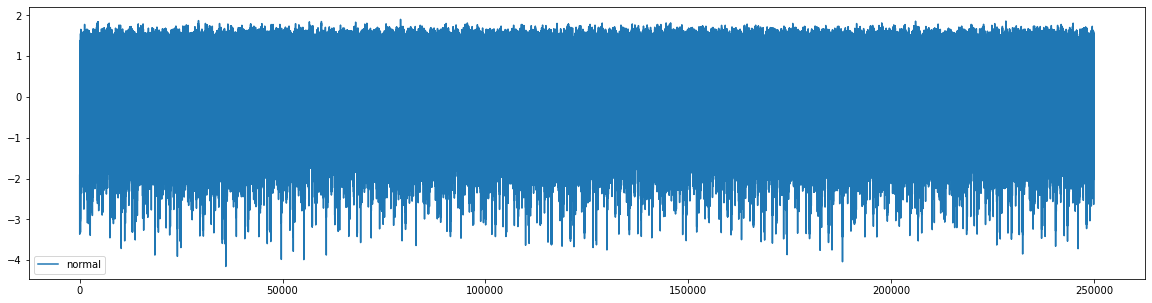

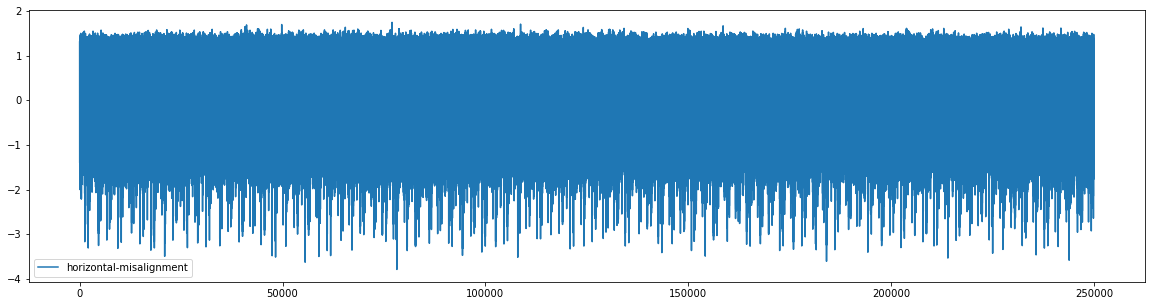

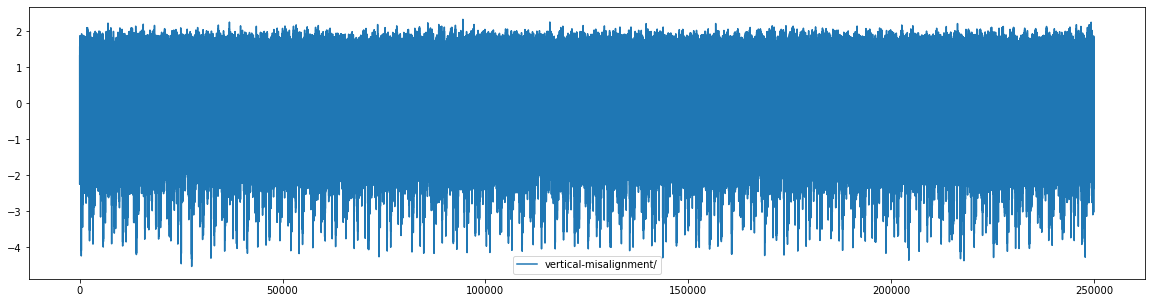

In [10]:
plt.figure(figsize=(20,5))
plt.plot(vibdf1,label="normal")
plt.legend(loc="best")
plt.show()
plt.close()
plt.figure(figsize=(20,5))
plt.plot(vibdf2,label="horizontal-misalignment")
plt.legend(loc="best")
plt.show()
plt.close()
plt.figure(figsize=(20,5))
plt.plot(vibdf3,label="vertical-misalignment/")
plt.legend(loc="best")
plt.show()
plt.close()


Running the below cell plots the time features of the datasets.

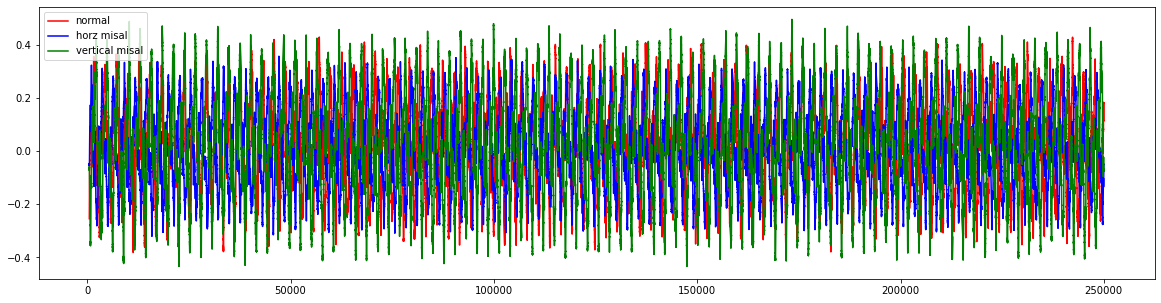

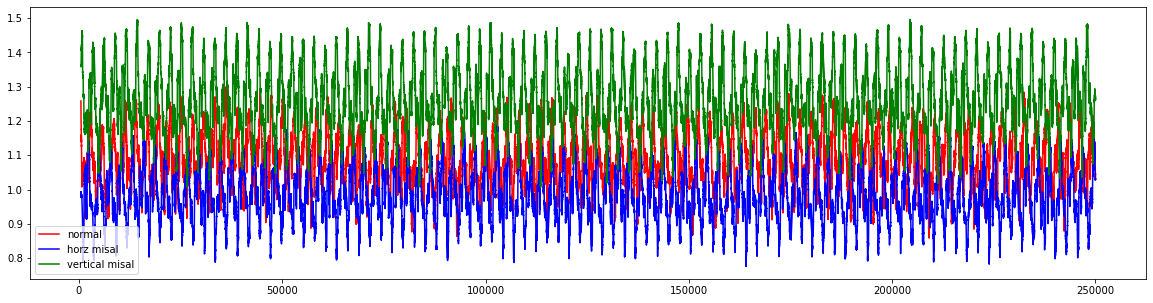

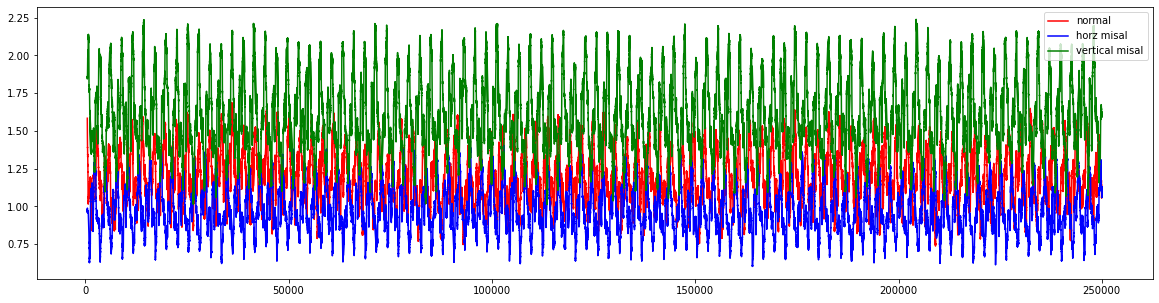

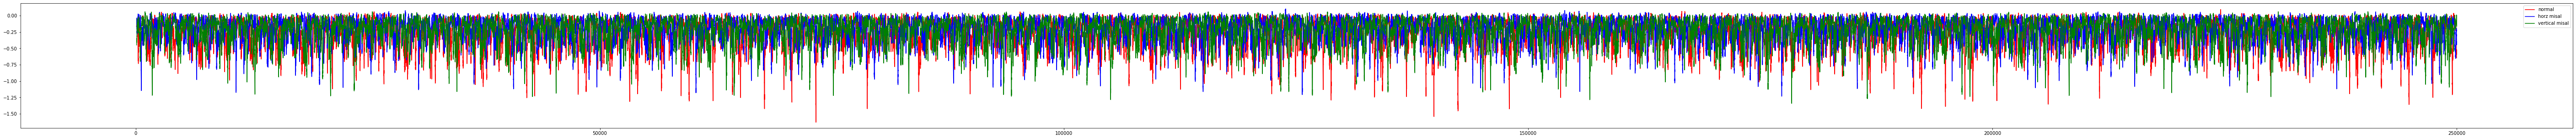

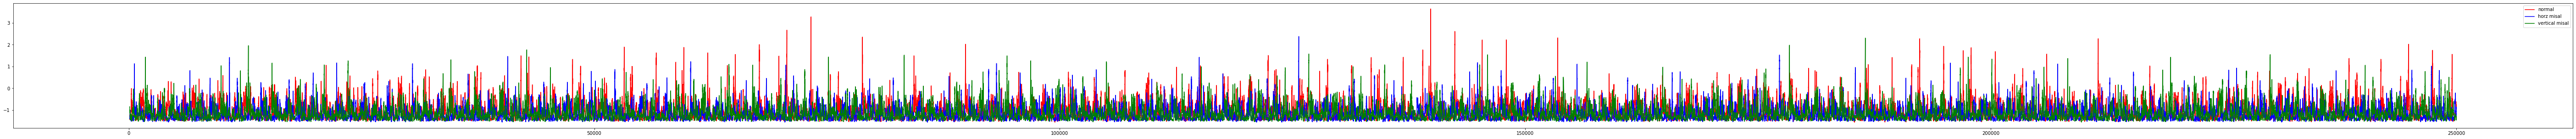

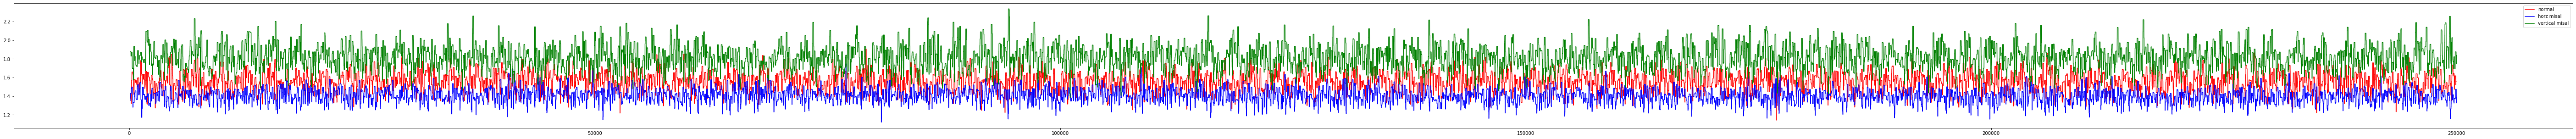

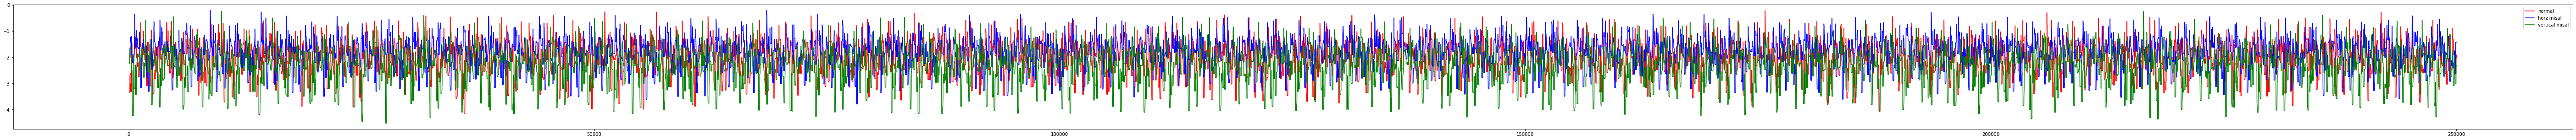

In [11]:
rolling_mean = vibdf1.rolling(500).mean()
rolling_mean1 = vibdf2.rolling(500).mean()
rolling_mean2 = vibdf3.rolling(500).mean()
#rolling_mean3 = vibd33.rolling(100).mean()
plt.figure(figsize=(20,5))
plt.plot(rolling_mean, color="red",label="normal")
plt.plot(rolling_mean1, color="blue",label="horz misal")
plt.plot(rolling_mean2, color="green",label="vertical misal")
#plt.plot(rolling_mean3, color="black",label="mixed dataset")
plt.legend(loc="best")
plt.show()
plt.close()

rolling_std = vibdf1.rolling(500).std()
rolling_std1 = vibdf2.rolling(500).std()
rolling_std2 = vibdf3.rolling(500).std()
plt.figure(figsize=(20,5))
plt.plot(rolling_std, color="red",label="normal")
plt.plot(rolling_std1, color="blue",label="horz misal")
plt.plot(rolling_std2, color="green",label="vertical misal")
plt.legend(loc="best")
plt.show()
plt.close()

rolling_var = vibdf1.rolling(500).var()
rolling_var1 = vibdf2.rolling(500).var()
rolling_var2 = vibdf3.rolling(500).var()
#print(rolling_var2[3000:10000])
plt.figure(figsize=(20,5))
plt.plot(rolling_var, color="red",label="normal")
plt.plot(rolling_var1, color="blue",label="horz misal")
plt.plot(rolling_var2, color="green",label="vertical misal")
plt.legend(loc="best")
plt.show()
plt.close()

rolling_skew = vibdf1.rolling(100).skew()
rolling_skew1 = vibdf2.rolling(100).skew()
rolling_skew2 = vibdf3.rolling(100).skew()
plt.figure(figsize=(100,5))
plt.plot(rolling_skew, color="red",label="normal")
plt.plot(rolling_skew1, color="blue",label="horz misal")
plt.plot(rolling_skew2, color="green",label="vertical misal")
plt.legend(loc="best")
plt.show()
plt.close()

rolling_kurt = vibdf1.rolling(100).kurt()
rolling_kurt1 = vibdf2.rolling(100).kurt()
rolling_kurt2 = vibdf3.rolling(100).kurt()
plt.figure(figsize=(100,5))
plt.plot(rolling_kurt, color="red",label="normal")
plt.plot(rolling_kurt1, color="blue",label="horz misal")
plt.plot(rolling_kurt2, color="green",label="vertical misal")
plt.legend(loc="best")
plt.show()
plt.close()

rolling_max = vibdf1.rolling(100).max()
rolling_max1 = vibdf2.rolling(100).max()
rolling_max2 = vibdf3.rolling(100).max()
plt.figure(figsize=(100,5))
plt.plot(rolling_max, color="red",label="normal")
plt.plot(rolling_max1, color="blue",label="horz misal")
plt.plot(rolling_max2, color="green",label="vertical misal")
plt.legend(loc="best")
plt.show()
plt.close()

rolling_min = vibdf1.rolling(100).min()
rolling_min1 = vibdf2.rolling(100).min()
rolling_min2 = vibdf3.rolling(100).min()
plt.figure(figsize=(100,5))
plt.plot(rolling_min, color="red",label="normal")
plt.plot(rolling_min1, color="blue",label="horz misal")
plt.plot(rolling_min2, color="green",label="vertical misal")
plt.legend(loc="best")
plt.show()
plt.close()



## 2. FREQUENCY DOMAIN

Fast Fourier Transform(FFT) has been done on the raw vibration data as a part of frequency domain analysis.

Sampling Frequency of the dataset used = 50kHz.

Sampling Frequency is the rate at which data is being generated per second by the sensor. OR the number of data points/sec

## 2.1 Defining FFT function

In [29]:
class freq_domain():
    def fft(self,data,sr):#data must be an array
        transform= np.fft.fft(data)
        Ymag= transform.real
        N=len(Ymag)
        print(N)
        n=np.arange(N)
        #sr=20000#sampling rate/freq
        T1=N/sr#time period/interval
        freq=n/T1
        n_oneside=N//2
        f_oneside=freq[:n_oneside]
        print(len(f_oneside))
        plt.figure(figsize = (15, 5))
        plt.plot(f_oneside, np.absolute(transform)[:n_oneside])
        #plt.xlim(0,1000)
        plt.xlabel('Freq (Hz)')
        plt.ylabel('FFT Amplitude')
        plt.show()
        return np.absolute(transform)[:n_oneside]

#call above function if you want to see its FFT. Make sure to change the sampling freq to 50000    
    

The 3 cells below will show the FFT plots for the corresonding datasets used (vibdf1: Normal, vibdf2: Horizontal Misalignment, vibdf3: Vertical Misalignment)

249999
124999


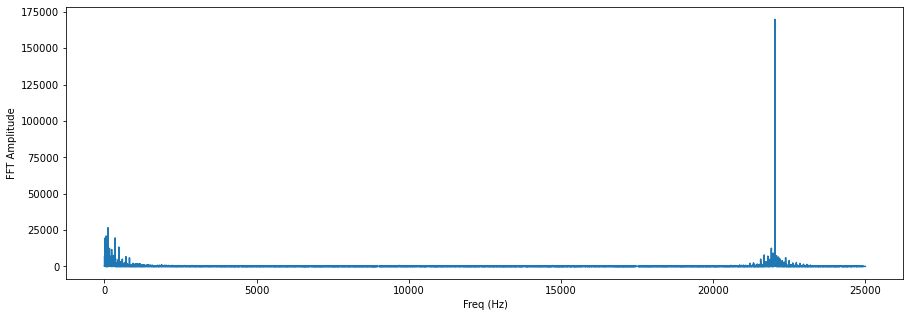

In [14]:
#First parameter is the data and second is the sampling rate
fft(vibdf1,50000)

249999
124999


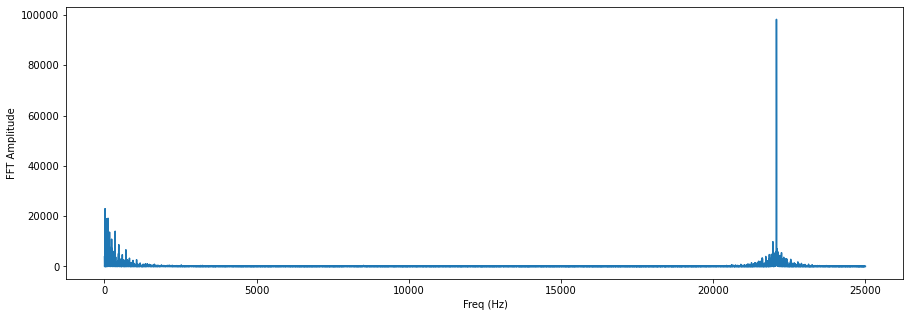

In [25]:
fft(vibdf2,50000)

249999
124999


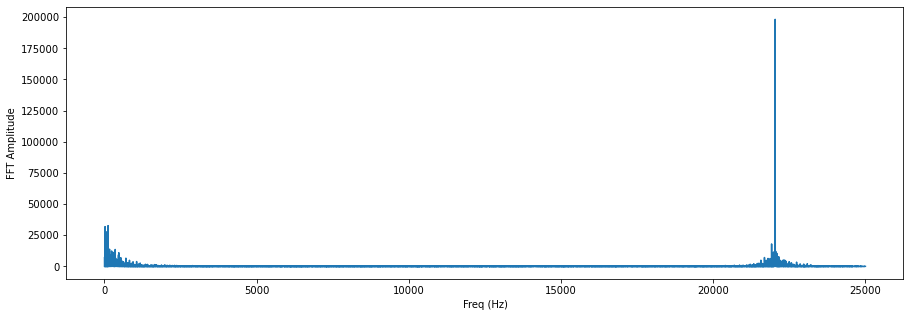

In [17]:
fft(vibdf3,50000)

## 3. TIME-FREQUENCY DOMAIN ANALYSIS

Below class makes a self object and stores the all the features in it. The features include:
1. Mean
2. Median
3. Standard Deviation
4. Variance
5. Skewness
6. Kurtosis
7. Max
8. Min
9. RMS(Root mean square)
10. Covariance
11. Crest Factor
12. Form Factor

In [ ]:
class Features:
    def __init__(self, fftlist):
        self.fftlist=fftlist

    def features_normal(self, fftList):#fftlist must be of type pandas
        self.mean = fftList.mean()
        self.median = np.median(fftList)
        self.std1 = fftList.std()
        self.var = fftList.var()
        self.skew =skew(fftList)
        self.kurt = kurtosis(fftList)
        self.max = fftList.max()
        self.min = fftList.min()
        self.rms=np.sqrt(np.mean(fftList**2))
        self.cov = np.cov(fftList)#covariance
        self.crest=np.max(np.abs(fftList))/np.sqrt(np.mean(np.square(fftList)))
        self.form=(np.sqrt(np.mean(fftList**2)))/np.mean(fftList)

        #self.corr = fftList.corr()#correlation
        #self.sem = fftList.sem()#standard error of mean
        #self.agg = fftList.aggregate()#aggregation function
        return self

**<span style='color:red'> Insert the path of the specific folder that contains the data files, in the path1 variable below </span>**

In [ ]:
path1=r"D:\MAFAULDA\horizontal-misalignment\0.5mm"
list1= os.listdir(path1)
list1

## 3.1 Extraction of features (both time domain and time-frequency domain features)

In [ ]:
mean_time2=[]
mean_stft2=[]
median_stft2=[]
std1_stft2 =[]
var_stft2 = []
skew_stft2 =[]
kurt_stft2 =[]
max_stft2 = []
min_stft2 = []
median_time2=[]
std1_time2=[]
var_time2= []
skew_time2=[]
kurt_time2=[]
max_time2= []
min_time2= []
rms_time2=[]
rms_stft2=[]
crest_stft2=[]
crest_time2=[]
form_stft2=[]
form_time2=[]
stft_raw2=[]
for files in list1:
    dft=pd.read_csv(f"{path}\{files}", sep=',')
    datat2=dft[dft.columns[6]]#CHANGE THE COLUMN NUMBER TO GET FEATURES FOR ANY OTHER COLUMN YOU WANT
    datat=[]
    for i in range(5):
        datat=datat2[50000*i:50000*(i+1)]
        feat_time2=Features(datat)
        feat_time2.features_normal(datat)
        mean_time2.append(feat_time2.mean)
        median_time2.append(feat_time2.median)
        std1_time2.append(feat_time2.std1) 
        var_time2.append(feat_time2.var) 
        skew_time2.append(feat_time2.skew) 
        kurt_time2.append(feat_time2.kurt)
        max_time2.append(feat_time2.max) 
        min_time2.append(feat_time2.min)  
        rms_time2.append(feat_time2.rms)
        crest_time2.append(feat_time2.crest)
        form_time2.append(feat_time2.form)
    
        spec2=plt.specgram(datat, Fs=50000, cmap="rainbow")
        stft2=spec2[0]
        #below line saves the plot to the directory you enter
        #to save in a particular folder, just copy the folder path and add it before the EMG{0}
        #plt.savefig('3rd_test_plots\EMG {0}.jpg'.format(files))

        #below line saves the STFT to the directory you enter
        #to save in a particular folder, just copy the folder path and add it before the EMG{0}
        #np.savetxt('2nd_test_STFTs\EMG {0}.csv'.format(files),stft2, delimiter=",")
        stft2=stft2.flatten()
        stft_raw2.append(stft2)
        feat_stft2=Features(stft2)
        feat_stft2.features_normal(stft2)
        mean_stft2.append(feat_stft2.mean)
        median_stft2.append(feat_stft2.median)
        std1_stft2.append(feat_stft2.std1)
        var_stft2.append(feat_stft2.var) 
        skew_stft2.append(feat_stft2.skew) 
        kurt_stft2.append(feat_stft2.kurt) 
        max_stft2.append(feat_stft2.max) 
        min_stft2.append(feat_stft2.min)
        rms_stft2.append(feat_stft2.rms)
        crest_stft2.append(feat_stft2.crest)
        form_stft2.append(feat_stft2.form)
        plt.show()
        #plt.savefig("path/{0}/{1}.pdf".format(i,i));
        plt.close()

## 3.2 Making the feature matrix

In [ ]:
feature_mat1=pd.DataFrame({'mean_time2':mean_time2,'mean_stft2':mean_stft2,'median_time2':median_time2,'median_stft2':median_stft2,'std1_time2':std1_time2,'std1_stft2':std1_stft2,'var_time2':var_time2,'var_stft2':var_stft2,'max_time2':max_time2,'max_stft2':max_stft2,'min_time2':min_time2,'min_stft2':min_stft2,'kurt_time2':kurt_time2,'kurt_stft2':kurt_stft2,'skew_time2':skew_time2,'skew_stft2':skew_stft2,'rms_time2':rms_time2,'rms_stft2':rms_stft2,'crest_time2':crest_time2,'crest_stft2':crest_stft2,'form_time2':form_time2,'form_stft2':form_stft2})
print(feature_mat1)


## 3.3 Saving the feature matrix as .csv file

In [ ]:
np.savetxt('features_horz_algn_0.5mm_col6.csv',feature_mat1, delimiter=",", header='mean_time2,mean_stft2,median_time2,median_stft2,std1_time2,std1_stft2,var_time2,var_stft2,max_time2,max_stft2,min_time2,min_stft2,kurt_time2,kurt_stft2,skew_time2,skew_stft2,rms_time2,rms_stft2,crest_time2,crest_stft2,form_time2,form_stft2')
#Remeber to change the file name(the one inside the quotes) before saving a feature matrix for a column else it will keep overwriting on the older one
#SO TO GET FEATURE MATRICES OF ALL 6 COLUMNS JUST CHANGE THE COLUMN NUMBER MENTIONED IN THE CODE ABOVE AND THE FILE NAME WITH WHICH YOU WANT TO SAVE IT

## 3.4 Plotting features (few of the above features are plotted for demonstration)

In [ ]:
print(type(stft2))
print(len(stft2))
stft2.shape

plt.figure(figsize=(20,5))
plt.plot(mean_time2)

plt.figure(figsize=(20,5))
plt.plot(mean_stft2)

plt.figure(figsize=(20,5))
plt.plot(std1_stft2)

plt.figure(figsize=(20,5))
plt.plot(std1_time2)

plt.figure(figsize=(20,5))
plt.plot(var_time2)

plt.figure(figsize=(20,5))
plt.plot(var_stft2)

np.shape(kurt_stft2)

# kurt_stft2_arr=np.array(kurt_stft2)
# len(kurt_stft2_arr[:,4])

# for i in range(kurt_stft2_arr.shape[1]):
#     plt.figure(figsize=(20,5))
#     plt.plot(kurt_stft2_arr[:,i])
#     plt.show()
#     plt.close()

plt.figure(figsize=(20,5))
plt.plot(kurt_time2)

plt.figure(figsize=(20,5))
plt.plot(median_stft2)

plt.figure(figsize=(20,5))
plt.plot(median_time2)

plt.figure(figsize=(20,5))
plt.plot(var_stft2)

plt.figure(figsize=(20,5))
plt.plot(min_stft2)

plt.figure(figsize=(20,5))
plt.plot(max_stft2)

plt.figure(figsize=(20,5))
plt.plot(min_time2)

plt.figure(figsize=(20,5))
plt.plot(max_time2)

## 4. FEATURE RANKING 

Once the feature matrix is saved, we don't need to run the loop again. Just directly read the csv files and access all the features.

In [ ]:
feature_out=pd.read_csv('result.csv',header=None)
X=feature_out
#creating the Y(labels according to dataset)
Y=[0]*910+[1]*74
len(Y)

Feature ranking methods used are: 
1. SelectKBest
2. Correlation Matrix
3. Recursive Feature Elimination

All of the above feature ranking methods yielded similar results for the used dataset. However, SelectKBest was chosen for the final code.

## 4.1 Method 1: SelectKBest 

In [ ]:
# Feature extraction
test = SelectKBest(k=4)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=8)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

## 4.2 Method 2: Correlation Matrix

In [ ]:
Y_series=pd.Series(Y)
correlation1=[]
for i in range(X.shape[1]):

    feature_series=pd.Series(X[i])
    correlation1.append(Y_series.corr(feature_series))
    

    # plotting the data
    plt.figure(figsize=(20,5))
    plt.scatter(feature_series, Y_series)
    
    # This will fit the best line into the graph
    plt.plot(np.unique(feature_series), np.poly1d(np.polyfit(feature_series, Y_series, 2))
             (np.unique(feature_series)), color='red')
    plt.show()
    plt.close()

In [ ]:
correlation1

In [ ]:
#ploting the heatmap for correlation
test=pd.DataFrame(X)
#test.insert(18,'',Y)
plt.figure(figsize=(20,20))
sns.heatmap(test.corr(), annot=True)
plt.show()
plt.close()

## 4.3 Method 3: RFE (Recursive Feature Elimination)

In [ ]:
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X_train, Y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

## 5. BINARY CLASSIFICATION

Classification problems with two class labels are referred to as binary classification. In most binary classification problems, one class represents the normal condition and the other represents the aberrant condition.

Here in this dataset we have defined:   
X_good: Normal/Healthy condition of the bearing  
X_bad: Faulty condition with Horizontal Misalignment in the bearing  
Model used: Logistic Regression

## 5.1 Initializing Dataframe for combining predictions

In [2]:
#RUN THIS ONCE
pred_all=[y_test,[0]*len(y_pred),[0]*len(y_pred),[0]*len(y_pred),[0]*len(y_pred),[0]*len(y_pred),[0]*len(y_pred)]
#I have made 7 columns (1 for original labels, 6 for the predictions from 6 columns of the dataset)

NameError: name 'y_test' is not defined

## 5.2 Getting Predictions

In [ ]:
#read the feature matrix files which you found using previous feature extraction code
X_good=pd.read_csv('features_normal_col6.csv')#enter the directory here
X_bad=pd.read_csv('features_horz_algn_0.5mm_col6.csv')
X_bad

In [ ]:
X_combined=X_good.append(X_bad)
#np.savetxt('combined1.csv',X_combined, delimiter=",")#Use this if you want to save it in your computer as csv file
X_combined

In [ ]:
#assign labels as per the file description
Y=[0]*245+[1]*250

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combined, Y, test_size=0.33, random_state=42)

In [ ]:
#scaling the trains and tests. Remember scaling changes type from dataframe to array
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [ ]:
#Train the model
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
#find  the predictions and print accuracy
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

In [ ]:
#Use below if you want to save the files
np.savetxt('pred_1.csv',y_pred,delimiter=',')

np.savetxt('org_1.csv',y_test,delimiter=',')
np.savetxt('X_test.csv',X_test,delimiter=',')

In [ ]:
print(y_test)
print(y_pred)

In [ ]:
#Print other metrics of model
print(classifier.intercept_)
print(classifier.coef_)
print(classifier.predict_proba(X_test))
conf_matrix=confusion_matrix(y_test, y_pred)

In [ ]:
fx = sns.heatmap(conf_matrix, annot=True, cmap='turbo')
fx.set_title('Plotting Confusion Matrix using Seaborn\n\n');
fx.set_xlabel('\nValues model predicted')
fx.set_ylabel('True Values ');

Run below cell everytime after you generate a new prediction BUT MAKE SURE TO CHANGE THE COLUMN NUMBER  
To generate new prediction, change the feature column you read initially and then run all the above codes(Module 5.2) again

In [ ]:
pred_all[1]=y_pred.tolist()

## 5.3 Combining all predictions for each column

Below cells combines all the predictions from every column to a single 2d array and then saves it locally

In [ ]:
#DO NOT RUN THIS UNTIL ALL PREDICTIONS ARE MADE
pred_all=np.array(pred_all,dtype=object)
pred_all=np.transpose(pred_all)
pred_all

In [ ]:
np.savetxt("pred_all.csv",pred_all,delimiter=',')

In [ ]:
pred_all_reading=pd.read_csv('pred_all.csv')
pred_all_reading

## 5.4 Logical Operation 

Once the predictions are combined, then to decide the final label, we take the majority of predictions for every incstance.  
So suppose if the six preditions for an instance are [1, 1, 1, 0, 1, 0] then the final label is chosen as '1' because it's the dominant label 

In [ ]:
pred_final=[]
for i in range(pred_all_reading.shape[0]):
    flag=pred_all_reading.iat[i,1]
    count=0
    for j in range(6):
        if (flag==pred_all_reading.iat[i,j]):
            count+=1
    if(count>=4):
        pred_final.append(flag)
    else:
        pred_final.append(int(not(flag)))
    
pred_final   

In [ ]:
pred_all_reading['pred_final']=pred_final
pred_all_reading

In [ ]:
print ("Accuracy : ", accuracy_score(y_test, pred_final))

## 6. MULTI-LABEL CLASSIFICATION

Multi class classification is the extension of binary classification in a way that it's applied for more than 2 classes.  Just as we used Logistic Regression for binary classfication, we use several models for multi-class classfication. Some of the models used here are:
1. Support Vector Classifier(SVC)
2. Decision Tree Classifier
3. Random Forest Classifier
4. KNN Classifier
5. AdaBoost

Note: Here we have used multi-class classification instead of multi-label classification because our classes are disjoint OR basically a condition can lie in one and only class (normal, horizontal misalignment, vertical misalignment)

In [4]:
X_good=pd.read_csv('features_normal_col6.csv')#enter the directory here
X_hor=pd.read_csv('features_horz_algn_0.5mm_col6.csv')
X_vert=pd.read_csv('features_normal_vert_misal_051mm_col6.csv')

In [5]:
X_combined=X_good.append(X_hor)
X_combined=X_combined.append(X_vert)
X_combined

# mean_time2  mean_stft2  median_time2  median_stft2  std1_time2  \
0        0.074216    0.000002      0.063057  3.769481e-09    0.181134   
1        0.029079    0.000002      0.030755  3.680710e-09    0.192753   
2       -0.124610    0.000002     -0.128270  3.739522e-09    0.195373   
3        0.004242    0.000001      0.000190  3.783157e-09    0.180039   
4        0.041926    0.000001      0.044716  3.799547e-09    0.176005   
..            ...         ...           ...           ...         ...   
250     -0.088546    0.000009     -0.061855  8.888953e-08    0.475579   
251     -0.077063    0.000011     -0.086954  8.881700e-08    0.533268   
252      0.243912    0.000015      0.208475  8.730998e-08    0.558122   
253      0.052759    0.000012      0.059159  8.979928e-08    0.537890   
254      0.058735    0.000012      0.090671  8.776789e-08    0.545084   

     std1_stft2  var_time2     var_stft2  max_time2  max_stft2  ...  \
0      0.000020   0.032810  3.964919e-10    0.64369   0.000934  ...   
1      0.000018   0.037154  3.256329e-10    0.58000   0.000771  ...   
2      0.000026   0.038171  7.006133e-10    0.49489   0.001010  ...   
3      0.000017   0.032414  2.835318e-10    0.65547   0.000900  ...   
4      0.000015   0.030978  2.119878e-10    0.53201   0.000571  ...   
..          ...        ...           ...        ...        ...  ...   
250    0.000079   0.226176  6.239137e-09    1.51540   0.002832  ...   
251    0.000104   0.284375  1.091138e-08    1.82270   0.004484  ...   
252    0.000160   0.311500  2.565277e-08    2.39780   0.006488  ...   
253    0.000107   0.289326  1.146019e-08    1.99810   0.004486  ...   
254    0.000118   0.297117  1.386575e-08    1.95770   0.005255  ...   

     kurt_time2  kurt_stft2  skew_time2  skew_stft2  rms_time2  rms_stft2  \
0     -0.346160  622.667783    0.163593   22.146538   0.195747   0.000020   
1     -0.415490  500.841642   -0.075241   19.826268   0.194932   0.000018   
2     -0.438791  473.959791    0.066585   19.543208   0.231728   0.000027   
3      0.003555  693.846383    0.206039   23.211766   0.180087   0.000017   
4     -0.682869  384.162640   -0.065819   17.424784   0.180928   0.000015   
..          ...         ...         ...         ...        ...        ...   
250    0.378824  385.332384   -0.349525   17.357877   0.483747   0.000080   
251   -0.108304  444.856511   -0.020413   18.355890   0.538802   0.000105   
252   -0.324145  501.280219    0.084139   20.002357   0.609087   0.000161   
253    0.150735  438.751989   -0.132463   18.288502   0.540466   0.000108   
254    0.295150  533.732250   -0.311028   20.168296   0.548234   0.000118   

     crest_time2  crest_stft2  form_time2  form_stft2  
0       3.288373    46.789373    2.637517   13.178264  
1       3.693486    42.576194    6.703476   12.049209  
2       3.411721    38.050664   -1.859622   12.419740  
3       3.639739    53.292752   42.458300   13.117177  
4       2.940445    39.053029    4.315415   11.188376  
..           ...          ...         ...         ...  
250     4.973259    35.610479   -5.463252    8.598404  
251     4.266131    42.668449   -6.991747    9.164316  
252     3.936709    40.336845    2.497156   10.895710  
253     4.185649    41.659310   10.244016    9.265934  
254     4.148228    44.395979    9.333985    9.897185  

[750 rows x 22 columns]

In [7]:
Y=['normal']*245+['horz']*250+['vert']*255
len(Y)

750

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combined, Y, test_size=0.33, random_state=42, stratify=Y)


In [119]:
#RUN THIS CELL IF THE DATASET IS SKEWED TOWARDS A PARTICULAR CLASS i.e THERE IS UNEVEN DISTRIBUTION OF CLASSES

# from imblearn.over_sampling import SMOTE
# sm=SMOTE(random_state=2)
# x_train_res,y_train_res=sm.fit_resample(X_train,y_train)


In [14]:
y_train=pd.DataFrame(y_train)
y_train.value_counts()

vert      171
horz      167
normal    164
dtype: int64

In [15]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

**Here onwards the different classifiers start. Only run the classifier you want to see the result of.**

## 6.1 Support Vector Classifier(SVC)

A SVM classifier, or support vector machine classifier, is a type of supervised machine learning algorithm that works by finding the hyperplane that maximizes the margin between the two or more classes

In [16]:
from sklearn.svm import SVC
model_svc=SVC()
y_train_arr=y_train.to_numpy()
y_train_arr=y_train_arr.ravel()
model_svc.fit(X_train,y_train_arr)
y_pred=model_svc.predict(X_test)

In [12]:
y_pred
np.savetxt('Y_pred6_SVC.csv',y_pred,delimiter=",",fmt='%s',header='pred_col6')

In [1]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

NameError: name 'accuracy_score' is not defined

In [125]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier(class_weight='balanced',max_depth=5)
model_dt.fit(X_train,y_train)
y_pred=model_dt.predict(X_test)

## 6.2 Decision Tree Classifier

Decision tree classifiers are supervised machine learning models that work like flowcharts. Each node of a decision tree represents a decision point that splits into two leaf nodes. Each of these nodes represents the outcome of the decision and each of the decisions can also turn into decision nodes. Eventually, the different decisions will lead to a final classification.

In [125]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier(class_weight='balanced',max_depth=5)
model_dt.fit(X_train,y_train)
y_pred=model_dt.predict(X_test)

In [126]:
y_pred
np.savetxt('Y_pred6_DT.csv',y_pred,delimiter=",",fmt='%s',header='pred_col6')

In [127]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6653225806451613
              precision    recall  f1-score   support

        horz       0.70      0.59      0.64        83
      normal       0.57      0.59      0.58        81
        vert       0.72      0.81      0.76        84

    accuracy                           0.67       248
   macro avg       0.66      0.66      0.66       248
weighted avg       0.67      0.67      0.66       248



## 6.3 Random Forest Classifier

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In [128]:
from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier(class_weight='balanced',n_estimators=10,random_state=1,max_depth=5)
y_train_arr=y_train.to_numpy()
y_train_arr=y_train_arr.ravel()
model_rf.fit(X_train,y_train_arr)
y_pred=model_rf.predict(X_test)

In [129]:
y_pred
np.savetxt('Y_pred6_RF.csv',y_pred,delimiter=",",fmt='%s',header='pred_col6')

In [130]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6814516129032258
              precision    recall  f1-score   support

        horz       0.67      0.66      0.67        83
      normal       0.62      0.52      0.56        81
        vert       0.73      0.86      0.79        84

    accuracy                           0.68       248
   macro avg       0.67      0.68      0.67       248
weighted avg       0.68      0.68      0.68       248



## 6.4 KNN Classifier

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [11]:
print(X_test.shape)
print(X_train.shape)
print(y_train.shape)


(248, 22)
(502, 22)
(502, 1)


In [131]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(3)
y_train_arr=y_train.to_numpy()
y_train_arr=y_train_arr.ravel()
model_knn.fit(X_train,y_train_arr)

KNeighborsClassifier(n_neighbors=3)

In [132]:
y_pred=model_knn.predict(X_test)
np.savetxt('Y_pred6_KNN.csv',y_pred,delimiter=",",fmt='%s',header='pred_col6')

In [133]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6048387096774194
              precision    recall  f1-score   support

        horz       0.54      0.66      0.60        83
      normal       0.50      0.37      0.43        81
        vert       0.75      0.77      0.76        84

    accuracy                           0.60       248
   macro avg       0.60      0.60      0.59       248
weighted avg       0.60      0.60      0.60       248



## 6.5 AdaBoost Classifier

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [134]:
from sklearn.ensemble import AdaBoostClassifier
model_ada=AdaBoostClassifier(learning_rate=0.01)
y_train_arr=y_train.to_numpy()
y_train_arr=y_train_arr.ravel()
model_ada.fit(X_train,y_train_arr)
y_pred=model_ada.predict(X_test)


In [135]:
y_pred=model_ada.predict(X_test)
np.savetxt('Y_pred6_Ada.csv',y_pred,delimiter=",",fmt='%s',header='pred_col6')

In [136]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6048387096774194
              precision    recall  f1-score   support

        horz       0.54      0.66      0.60        83
      normal       0.50      0.37      0.43        81
        vert       0.75      0.77      0.76        84

    accuracy                           0.60       248
   macro avg       0.60      0.60      0.59       248
weighted avg       0.60      0.60      0.60       248



## 6.6 Combining predictions

In [17]:
#RUN THIS ONCE
pred_all=[y_test,[0]*len(y_pred),[0]*len(y_pred),[0]*len(y_pred),[0]*len(y_pred),[0]*len(y_pred),[0]*len(y_pred)]
#I have made 7 columns (1 for original labels, 6 for the predictions from 6 columns of the dataset)

**Run the below cell subsequently to read predictions of a single type of classifier. Suppose you want to combine the predictions of all 6 columns of SVC then just read the 6 .csv files of SVC classifier one by one.**

In [31]:
#Change the file name in quotes according to the column number and classifier name
pred_curr=pd.read_csv("Y_pred3_SVC.csv")
pred_curr=pred_curr.iloc[:,0].tolist()
pred_curr

['vert',
 'vert',
 'normal',
 'normal',
 'horz',
 'vert',
 'vert',
 'horz',
 'vert',
 'horz',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'vert',
 'horz',
 'horz',
 'normal',
 'normal',
 'vert',
 'vert',
 'vert',
 'normal',
 'horz',
 'horz',
 'normal',
 'vert',
 'normal',
 'horz',
 'horz',
 'horz',
 'vert',
 'vert',
 'normal',
 'normal',
 'normal',
 'normal',
 'horz',
 'vert',
 'normal',
 'normal',
 'vert',
 'vert',
 'vert',
 'horz',
 'vert',
 'normal',
 'vert',
 'vert',
 'horz',
 'horz',
 'horz',
 'vert',
 'normal',
 'vert',
 'horz',
 'horz',
 'normal',
 'normal',
 'horz',
 'vert',
 'horz',
 'horz',
 'vert',
 'normal',
 'vert',
 'vert',
 'horz',
 'horz',
 'vert',
 'vert',
 'vert',
 'normal',
 'vert',
 'horz',
 'vert',
 'horz',
 'normal',
 'vert',
 'normal',
 'horz',
 'horz',
 'horz',
 'normal',
 'vert',
 'vert',
 'vert',
 'horz',
 'normal',
 'normal',
 'normal',
 'normal',
 'vert',
 'horz',
 'normal',
 'vert',
 'horz',
 'normal',
 'vert',
 'vert',
 'vert',
 'vert',
 'horz'

In [32]:
# Run this everytime after you generate a new prediction BUT MAKE SURE TO CHANGE THE COLUMN NUMBER
# To generate new prediction, change the feature column you read initially and then run all the above codes(of the specific classifier only) again
pred_all[3]=pred_curr

In [30]:
#DO NOT RUN THIS UNTIL ALL PREDICTIONS ARE MADE
pred_all=np.array(pred_all,dtype=object)
pred_all=np.transpose(pred_all)
pred_all

array([['vert', list(['vert']), list(['vert']), ..., list(['vert']),
        list(['vert']), list(['vert'])],
       ['vert', list(['vert']), list(['vert']), ..., list(['vert']),
        list(['vert']), list(['vert'])],
       ['normal', list(['normal']), list(['normal']), ...,
        list(['vert']), list(['vert']), list(['vert'])],
       ...,
       ['horz', list(['horz']), list(['horz']), ..., list(['horz']),
        list(['horz']), list(['normal'])],
       ['vert', list(['vert']), list(['vert']), ..., list(['vert']),
        list(['vert']), list(['vert'])],
       ['normal', list(['normal']), list(['normal']), ...,
        list(['normal']), list(['normal']), list(['normal'])]],
      dtype=object)

In [32]:
np.savetxt("pred_all.csv",pred_all,fmt="%s",delimiter=',')

In [3]:
pred_all_reading=pd.read_csv('pred_all.csv')
pred_all_reading

vert    ['vert']  ['vert'].1  ['vert'].2  ['vert'].3  ['vert'].4  \
0      vert    ['vert']    ['vert']    ['vert']    ['vert']    ['vert']   
1    normal  ['normal']  ['normal']  ['normal']    ['vert']    ['vert']   
2    normal  ['normal']  ['normal']  ['normal']  ['normal']  ['normal']   
3      horz    ['horz']    ['horz']    ['horz']    ['horz']    ['horz']   
4    normal  ['normal']  ['normal']    ['vert']  ['normal']  ['normal']   
..      ...         ...         ...         ...         ...         ...   
242    horz    ['horz']    ['horz']    ['horz']    ['horz']    ['horz']   
243    horz    ['horz']    ['horz']    ['horz']    ['horz']    ['horz']   
244    horz    ['horz']    ['horz']    ['horz']    ['horz']    ['horz']   
245    vert    ['vert']    ['vert']    ['vert']    ['vert']    ['vert']   
246  normal  ['normal']  ['normal']  ['normal']  ['normal']  ['normal']   

     ['vert'].5  
0      ['vert']  
1      ['vert']  
2    ['normal']  
3      ['horz']  
4    ['normal']  
..          ...  
242    ['horz']  
243  ['normal']  
244  ['normal']  
245    ['vert']  
246  ['normal']  

[247 rows x 7 columns]

In [45]:
import re
for i in range(1,7):
    for j in range(pred_all_reading.shape[0]):
        pred_all_reading.iloc[j,i]=re.sub(r"[\[\]]",'',pred_all_reading.iloc[j,i])
        pred_all_reading.iloc[j,i]=pred_all_reading.iloc[j,i].replace("'",'')
pred_all_reading

vert ['vert'] ['vert'].1 ['vert'].2 ['vert'].3 ['vert'].4 ['vert'].5
0      vert     vert       vert       vert       vert       vert       vert
1    normal   normal     normal     normal       vert       vert       vert
2    normal   normal     normal     normal     normal     normal     normal
3      horz     horz       horz       horz       horz       horz       horz
4    normal   normal     normal       vert     normal     normal     normal
..      ...      ...        ...        ...        ...        ...        ...
242    horz     horz       horz       horz       horz       horz       horz
243    horz     horz       horz       horz       horz       horz     normal
244    horz     horz       horz       horz       horz       horz     normal
245    vert     vert       vert       vert       vert       vert       vert
246  normal   normal     normal     normal     normal     normal     normal

[247 rows x 7 columns]

## 6.7 Deciding Final Labels

Similar to Binary Classification, final label is decided based on the majority label of the all 6 predictions. Below is the code for the same, applied for deciding final label of Support Vector Classifier.

In [48]:
pred_final=[]
for i in range(pred_all_reading.shape[0]):
    flag1=pred_all_reading.iat[i,1]
    count=0
    for j in range(6):
        if (flag1==pred_all_reading.iat[i,j]):
            count+=1
        else:
            flag2=pred_all_reading.iat[i,j]
    if(count>=4):
        pred_final.append(flag1)
    else:
        pred_final.append(flag2)
    
pred_final   

['vert',
 'normal',
 'normal',
 'horz',
 'normal',
 'vert',
 'horz',
 'vert',
 'horz',
 'normal',
 'normal',
 'horz',
 'normal',
 'normal',
 'vert',
 'horz',
 'vert',
 'normal',
 'normal',
 'vert',
 'vert',
 'vert',
 'normal',
 'horz',
 'horz',
 'normal',
 'horz',
 'normal',
 'horz',
 'horz',
 'horz',
 'vert',
 'vert',
 'normal',
 'vert',
 'normal',
 'normal',
 'horz',
 'vert',
 'normal',
 'normal',
 'vert',
 'vert',
 'vert',
 'horz',
 'vert',
 'vert',
 'vert',
 'vert',
 'horz',
 'horz',
 'horz',
 'vert',
 'normal',
 'vert',
 'horz',
 'horz',
 'normal',
 'normal',
 'horz',
 'vert',
 'horz',
 'horz',
 'vert',
 'normal',
 'vert',
 'vert',
 'horz',
 'horz',
 'vert',
 'vert',
 'vert',
 'normal',
 'vert',
 'horz',
 'vert',
 'horz',
 'normal',
 'vert',
 'vert',
 'horz',
 'horz',
 'horz',
 'normal',
 'vert',
 'vert',
 'normal',
 'horz',
 'normal',
 'normal',
 'normal',
 'normal',
 'vert',
 'horz',
 'normal',
 'vert',
 'vert',
 'normal',
 'vert',
 'vert',
 'vert',
 'vert',
 'horz',
 'vert',
 '

In [50]:
print ("Accuracy : ", accuracy_score(pred_all_reading.iloc[:,0], pred_final))

Accuracy :  0.9838056680161943


## Exporting using pickle

249999
124999


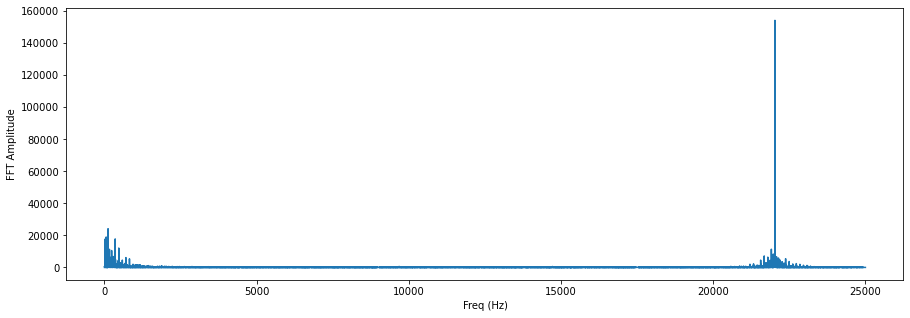

array([4.68958206e-12, 3.11210388e+02, 5.47529245e+02, ...,
       2.40724792e+01, 2.31098154e+01, 2.20714274e+01])

In [30]:
obj= freq_domain()
obj.fft(vibdf1,50000)

In [31]:
import pickle

pickle.dump(obj, open('fft_pickle2.pkl','wb'))

249999
124999


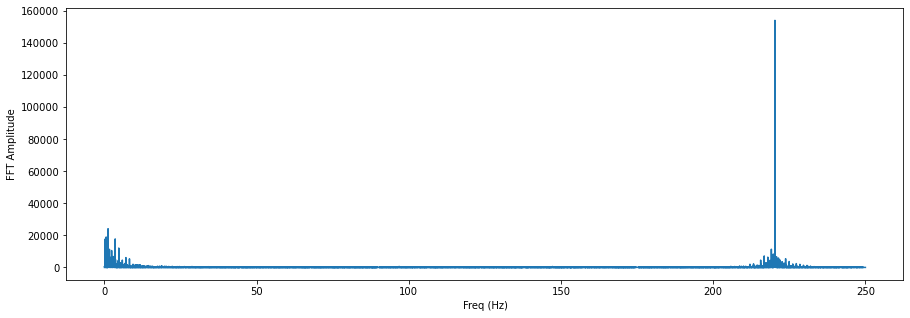

array([4.68958206e-12, 3.11210388e+02, 5.47529245e+02, ...,
       2.40724792e+01, 2.31098154e+01, 2.20714274e+01])

In [32]:
res=pickle.load(open('fft_pickle.pkl','rb'))
res(vibdf1,500)

In [17]:
import pickle
pickle.dump(model_svc, open('svc_model.pkl','wb'))